# Task 2: Model Building and Training

This notebook focuses on building and training machine learning models to detect fraud in e-commerce and credit card transactions. The key objectives are:
1. Preprocess the dataset (handle missing values, encode categorical features, scale numeric data).
2. Build and compare multiple machine learning models.
3. Evaluate models using metrics like accuracy and AUC.
4. Visualize and analyze the results.


In [16]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../scripts')))

In [17]:
from model_training import *

## Load and Preprocess Data

In [18]:
# Load preprocessed datasets
X_fraud = pd.read_csv("../data/X_fraud.csv")
y_fraud = pd.read_csv("../data/y_fraud.csv").squeeze()  # Convert to Series

X_creditcard = pd.read_csv("../data/X_creditcard.csv")
y_creditcard = pd.read_csv("../data/y_creditcard.csv").squeeze()  # Convert to Series

# Display basic information
print("Fraud Dataset Features:")
print(X_fraud.info())
print("\nFraud Dataset Target:")
print(y_fraud.value_counts())

print("\nCredit Card Dataset Features:")
print(X_creditcard.info())
print("\nCredit Card Dataset Target:")
print(y_creditcard.value_counts())


Fraud Dataset Features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   purchase_value     151112 non-null  float64
 1   device_id          151112 non-null  object 
 2   source             151112 non-null  int64  
 3   browser            151112 non-null  int64  
 4   sex                151112 non-null  int64  
 5   age                151112 non-null  int64  
 6   country            151112 non-null  int64  
 7   transaction_count  151112 non-null  float64
 8   hour_of_day        151112 non-null  int64  
 9   day_of_week        151112 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 11.5+ MB
None

Fraud Dataset Target:
class
0    136961
1     14151
Name: count, dtype: int64

Credit Card Dataset Features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 3

## Split, Balance, and Scale Data

In [19]:
# Split the data
X_fraud_train, X_fraud_test, y_fraud_train, y_fraud_test = split_data(X_fraud, y_fraud)
X_credit_train, X_credit_test, y_credit_train, y_credit_test = split_data(X_creditcard, y_creditcard)

# Balance and scale the fraud dataset
X_fraud_train_balanced, y_fraud_train_balanced = balance_data(X_fraud_train, y_fraud_train)
X_fraud_train_scaled = preprocess_and_scale_data(X_fraud_train_balanced)
X_fraud_test_scaled = preprocess_and_scale_data(X_fraud_test)

# Scale the credit card dataset
X_credit_train_scaled = preprocess_and_scale_data(X_credit_train)
X_credit_test_scaled = preprocess_and_scale_data(X_credit_test)


2024-11-20 07:11:32,021 - INFO - Splitting the dataset into training and testing sets
2024-11-20 07:11:32,329 - INFO - Splitting the dataset into training and testing sets
2024-11-20 07:11:32,804 - INFO - Balancing the dataset using SMOTE
2024-11-20 07:11:32,807 - INFO - Encoding categorical features
2024-11-20 07:11:33,798 - INFO - Encoded column: device_id
2024-11-20 07:11:35,053 - INFO - Before Resampling: [109588  11301]
2024-11-20 07:11:35,057 - INFO - After Resampling: [109588 109588]
2024-11-20 07:11:35,069 - INFO - Preprocessing and scaling data
2024-11-20 07:11:35,265 - INFO - Preprocessing and scaling data
2024-11-20 07:11:35,469 - INFO - Encoded column: device_id
2024-11-20 07:11:35,495 - INFO - Preprocessing and scaling data
2024-11-20 07:11:35,816 - INFO - Preprocessing and scaling data


##  Train and Compare Models

2024-11-20 07:12:15,494 - INFO - Comparing multiple models
2024-11-20 07:12:15,506 - INFO - Performing cross-validation for model: LogisticRegression


Evaluating models for Fraud Dataset:


2024-11-20 07:12:17,333 - INFO - Cross-Validation AUC: 0.59 ± 0.02
2024-11-20 07:12:17,335 - INFO - Training and evaluating model: LogisticRegression
2024-11-20 07:12:17,985 - INFO - Model: LogisticRegression | Accuracy: 0.50 | AUC: 0.50
2024-11-20 07:12:18,039 - INFO - Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.50      0.64     27373
           1       0.09      0.50      0.16      2850

    accuracy                           0.50     30223
   macro avg       0.50      0.50      0.40     30223
weighted avg       0.83      0.50      0.60     30223

2024-11-20 07:12:18,040 - INFO - Performing cross-validation for model: DecisionTreeClassifier
2024-11-20 07:12:34,987 - INFO - Cross-Validation AUC: 0.84 ± 0.02
2024-11-20 07:12:34,989 - INFO - Training and evaluating model: DecisionTreeClassifier
2024-11-20 07:12:40,340 - INFO - Model: DecisionTreeClassifier | Accuracy: 0.72 | AUC: 0.64
2024-11-20 07:12:40,399 - INFO - Class

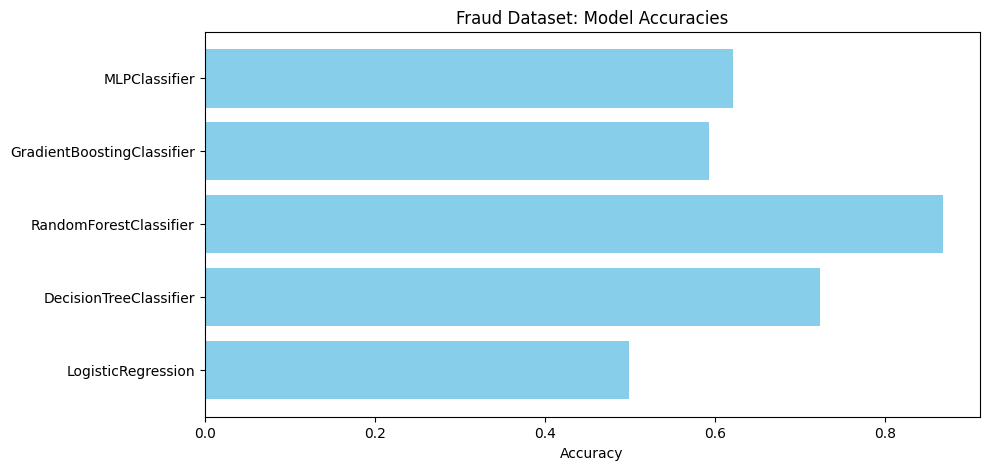

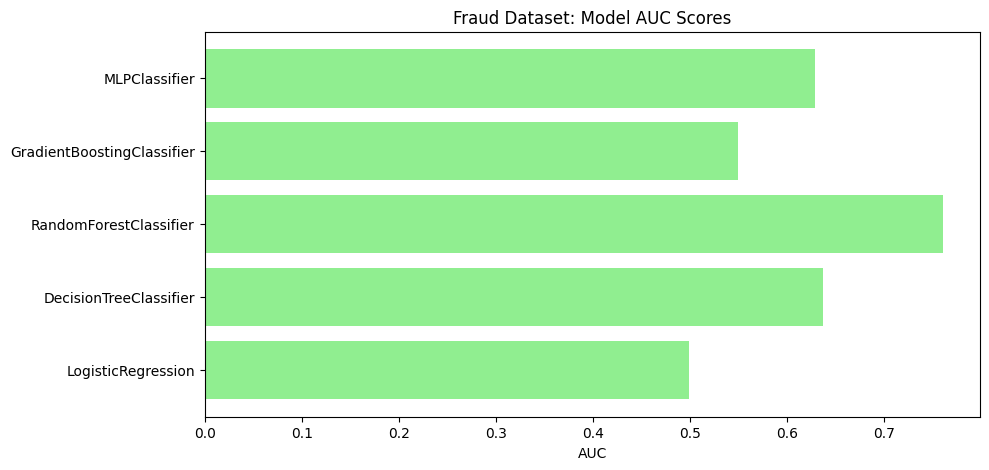

2024-11-20 07:56:23,661 - INFO - Comparing multiple models
2024-11-20 07:56:23,683 - INFO - Performing cross-validation for model: LogisticRegression


Evaluating models for Credit Card Dataset:


2024-11-20 07:56:37,090 - INFO - Cross-Validation AUC: 0.98 ± 0.01
2024-11-20 07:56:37,092 - INFO - Training and evaluating model: LogisticRegression
2024-11-20 07:56:40,277 - INFO - Model: LogisticRegression | Accuracy: 0.97 | AUC: 0.98
2024-11-20 07:56:40,353 - INFO - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

2024-11-20 07:56:40,354 - INFO - Performing cross-validation for model: DecisionTreeClassifier
2024-11-20 07:58:24,819 - INFO - Cross-Validation AUC: 0.86 ± 0.02
2024-11-20 07:58:24,822 - INFO - Training and evaluating model: DecisionTreeClassifier
2024-11-20 07:58:57,576 - INFO - Model: DecisionTreeClassifier | Accuracy: 1.00 | AUC: 0.88
2024-11-20 07:58:57,655 - INFO - Class

KeyboardInterrupt: 

In [20]:
# Train and compare models for Fraud Dataset
print("Evaluating models for Fraud Dataset:")
fraud_results = compare_models(X_fraud_train_scaled, X_fraud_test_scaled, y_fraud_train_balanced, y_fraud_test)
plot_model_results(fraud_results, "Fraud Dataset")

# Train and compare models for Credit Card Dataset
print("Evaluating models for Credit Card Dataset:")
credit_results = compare_models(X_credit_train_scaled, X_credit_test_scaled, y_credit_train, y_credit_test)
plot_model_results(credit_results, "Credit Card Dataset")


## Save and Summarize Results

In [ ]:
# Save results to CSV for future analysis
fraud_results_df = pd.DataFrame(fraud_results, columns=["Model", "Accuracy", "AUC"])
fraud_results_df.to_csv("../results/fraud_results.csv", index=False)

credit_results_df = pd.DataFrame(credit_results, columns=["Model", "Accuracy", "AUC"])
credit_results_df.to_csv("../results/credit_results.csv", index=False)

# Display summary
print("\nFraud Dataset Results:")
print(fraud_results_df)

print("\nCredit Card Dataset Results:")
print(credit_results_df)


In [4]:

# Split the data
X_fraud_train, X_fraud_test, y_fraud_train, y_fraud_test = split_data(X_fraud, y_fraud)


2024-11-20 05:43:51,657 - INFO - Splitting the dataset into training and testing sets


In [13]:
# Balance the data
X_fraud_train_balanced, y_fraud_train_balanced = balance_data(X_fraud_train, y_fraud_train)

2024-11-20 06:24:24,489 - INFO - Balancing the dataset using SMOTE
2024-11-20 06:24:24,492 - INFO - Encoding categorical features
2024-11-20 06:24:25,332 - INFO - Encoded column: device_id
2024-11-20 06:24:25,667 - INFO - Before Resampling: [109588  11301]
2024-11-20 06:24:25,670 - INFO - After Resampling: [109588 109588]


In [14]:
# Preprocess and scale the training and testing data
X_fraud_train_scaled = preprocess_and_scale_data(X_fraud_train_balanced)
X_fraud_test_scaled = preprocess_and_scale_data(X_fraud_test)


2024-11-20 06:24:32,869 - INFO - Preprocessing and scaling data
2024-11-20 06:24:33,044 - INFO - Preprocessing and scaling data
2024-11-20 06:24:33,221 - INFO - Encoded column: device_id


In [9]:
# Train and compare models
fraud_results = compare_models(X_fraud_train_scaled, X_fraud_test_scaled, y_fraud_train_balanced, y_fraud_test)

2024-11-20 05:47:02,876 - INFO - Comparing multiple models
2024-11-20 05:47:02,878 - INFO - Performing cross-validation for model: LogisticRegression
2024-11-20 05:47:05,444 - INFO - Cross-Validation AUC: 0.59 ± 0.02
2024-11-20 05:47:05,446 - INFO - Training and evaluating model: LogisticRegression
2024-11-20 05:47:06,661 - INFO - Model: LogisticRegression | Accuracy: 0.50 | AUC: 0.50
2024-11-20 05:47:06,752 - INFO - Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.50      0.64     27373
           1       0.09      0.50      0.16      2850

    accuracy                           0.50     30223
   macro avg       0.50      0.50      0.40     30223
weighted avg       0.83      0.50      0.60     30223

2024-11-20 05:47:06,753 - INFO - Performing cross-validation for model: DecisionTreeClassifier
2024-11-20 05:47:23,172 - INFO - Cross-Validation AUC: 0.84 ± 0.02
2024-11-20 05:47:23,173 - INFO - Training and evaluating model: Dec

2024-11-20 06:18:35,910 - INFO - Visualizing model results for Fraud Dataset


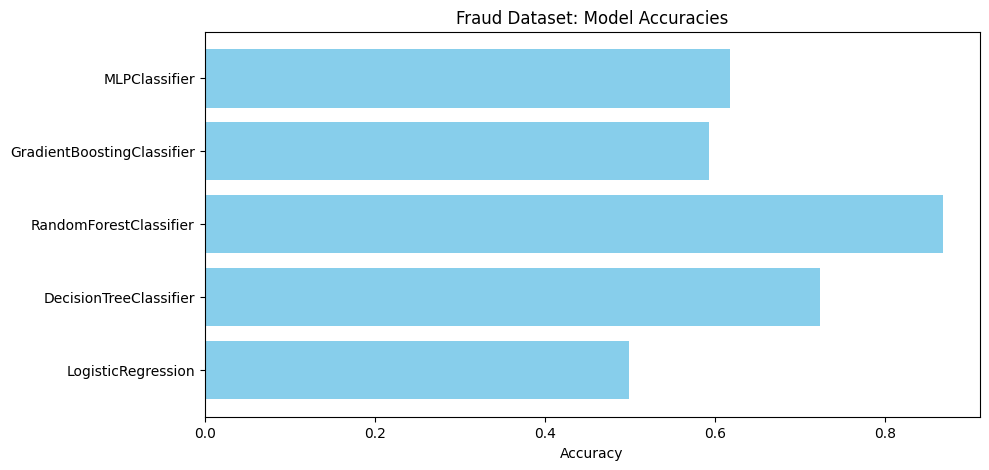

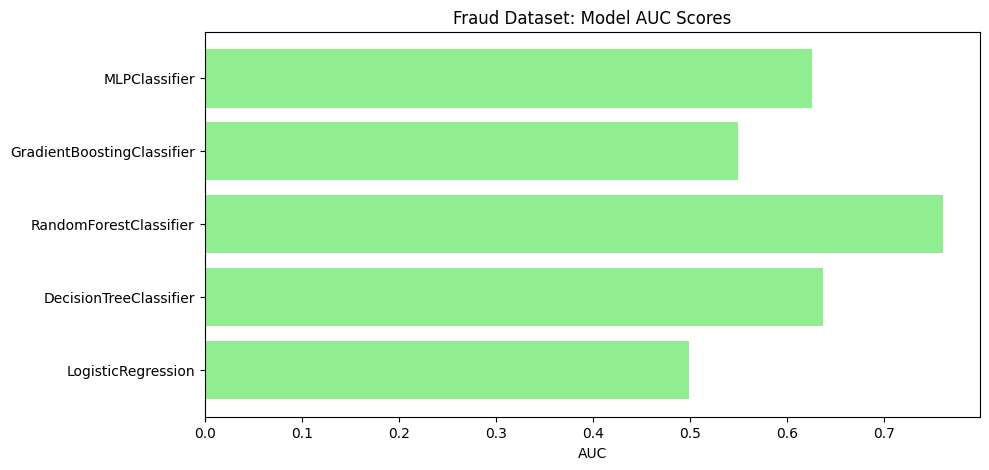

In [10]:
# Visualize results
plot_model_results(fraud_results, "Fraud Dataset")